# 1. IMPORTING LIBRARIES

In [1]:
#importing the usefull libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor


# 2. IMPORTING DATASET

In [2]:
# importing the data 
df = pd.read_excel('housing_dataset.xlsx')

In [3]:
# reading the first five columns in a dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
# total count of the dataset
df.shape

(20640, 10)

In [5]:
# datatypes of the dataset
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


C:\Users\kiran kumar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kiran kumar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 1440x720 with 0 Axes>

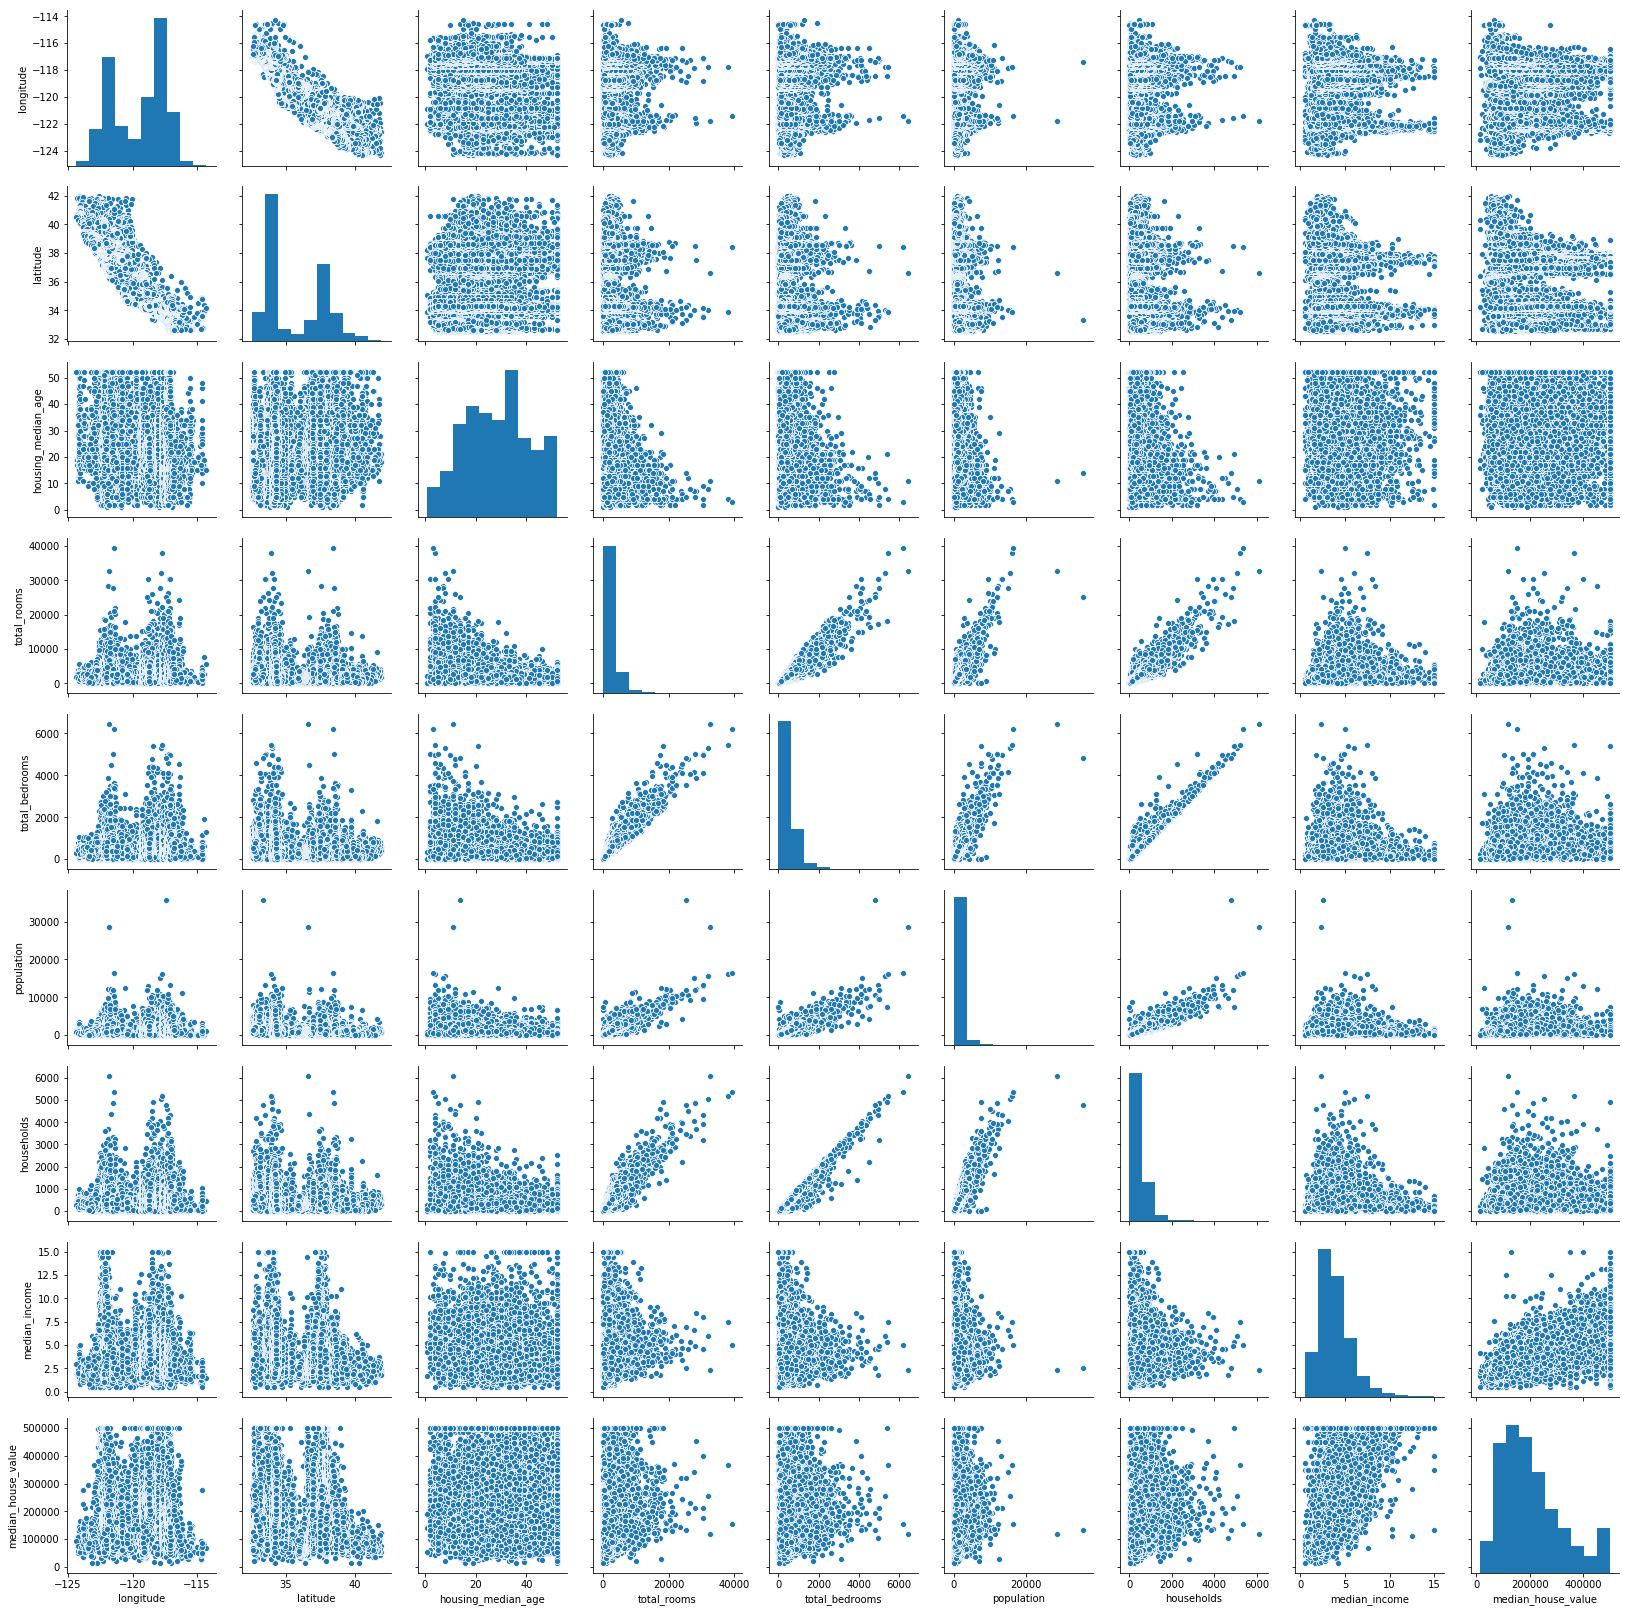

In [7]:
plt.figure(figsize=(20,10))
sns.pairplot(df)

In [8]:
corr = df.corr()

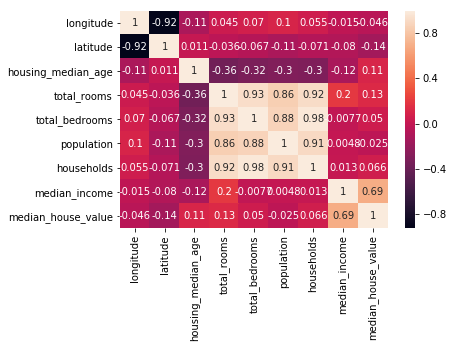

In [9]:
# correlation between the each and every variable 
sns.heatmap(df.corr(),annot=True)

In [10]:
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### Observations:

- The dependent variable `Median house value` is correlated with `median income`, so this is the main independent variable which is changing the relation of median house value

# 3. HANDLING MISSING VALUES

In [11]:
# checking the null values in DataFrame
(df.isnull().sum()/df.shape[0])*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

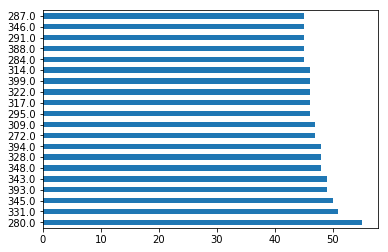

In [12]:
df['total_bedrooms'].value_counts().head(20).plot.barh()

**Imputing the total bedroom column null values with Linear regression.**
- The population and total rooms were impacting with the total bedrooms column
- So, i take the total rooms and population as independent variables in total bedroom column is dependent variable 
- created the train and test values with using these dependent and independent variables later i predict the values which are null in total bedrooms column

In [5]:
df_null = df[df['total_bedrooms'].isnull()]
df_null.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,NEAR BAY,161900
341,-122.17,37.75,38,992,NaN,732,259,1.6196,NEAR BAY,85100
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,NEAR BAY,173400
563,-122.24,37.75,45,891,NaN,384,146,4.9489,NEAR BAY,247100
696,-122.10,37.69,41,746,NaN,387,161,3.9063,NEAR BAY,178400


In [6]:
df_not_null = df[df['total_bedrooms'].notnull()]
df_not_null.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [7]:
df_null_train = df_not_null[['total_rooms','population']]
df_null_test = df_not_null['total_bedrooms']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(df_null_train,df_null_test,test_size = 0.2,random_state = 40)

In [9]:
model_lr  = LinearRegression().fit(X_train,y_train)

In [10]:
y_pred_bedrooms = model_lr.predict(X_test)

In [11]:
y_pred_bedrooms_null = model_lr.predict(df_null[['total_rooms','population']])

In [12]:
df_null['pred'] = np.round(y_pred_bedrooms_null,0)
df_null.drop('total_bedrooms',axis = 1,inplace = True)


C:\Users\kiran kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\kiran kumar\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
df_null.rename(columns = {'pred':'total_bedrooms'},inplace = True)

C:\Users\kiran kumar\Anaconda3\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [14]:
df_null

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,median_house_value,total_bedrooms
290,-122.16,37.77,47,1256,570,218,4.3750,NEAR BAY,161900,263.0
341,-122.17,37.75,38,992,732,259,1.6196,NEAR BAY,85100,246.0
538,-122.28,37.78,29,5154,3741,1273,2.5762,NEAR BAY,173400,1119.0
563,-122.24,37.75,45,891,384,146,4.9489,NEAR BAY,247100,195.0
696,-122.10,37.69,41,746,387,161,3.9063,NEAR BAY,178400,176.0
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,3171,779,3.3409,NEAR OCEAN,220500,855.0
20268,-119.18,34.19,19,2393,1938,762,1.6953,NEAR OCEAN,167400,561.0
20372,-118.88,34.17,15,4260,1701,669,5.1033,<1H OCEAN,410700,783.0
20460,-118.75,34.29,17,5512,2734,814,6.6073,<1H OCEAN,258100,1059.0


In [31]:
df_final = pd.concat([df_not_null,df_null],axis = 0)

C:\Users\kiran kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [32]:
df_final.isnull().sum()

households            0
housing_median_age    0
latitude              0
longitude             0
median_house_value    0
median_income         0
ocean_proximity       0
population            0
total_bedrooms        0
total_rooms           0
dtype: int64

In [33]:
df_final.to_excel('df_final.xlsx')

In [25]:
df_final.shape

(20640, 10)

In [26]:
df_final.describe(include = 'all')

,households,housing_median_age,latitude,longitude,median_house_value,median_income,ocean_proximity,population,total_bedrooms,total_rooms
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640,20640.000000,20640.000000,20640.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,9136,NaN,NaN,NaN
mean,499.539680,28.639486,35.631861,-119.569704,206855.816909,3.870671,NaN,1425.476744,537.829797,2635.763081
std,382.329753,12.585558,2.135952,2.003532,115395.615874,1.899822,NaN,1132.462122,420.626546,2181.615252
min,1.000000,1.000000,32.540000,-124.350000,14999.000000,0.499900,NaN,3.000000,1.000000,2.000000
25%,280.000000,18.000000,33.930000,-121.800000,119600.000000,2.563400,NaN,787.000000,296.000000,1447.750000
50%,409.000000,29.000000,34.260000,-118.490000,179700.000000,3.534800,NaN,1166.000000,435.000000,2127.000000
75%,605.000000,37.000000,37.710000,-118.010000,264725.000000,4.743250,NaN,1725.000000,647.000000,3148.000000


In [17]:
##selecting the numerical columns
num_cols = [feature for feature in df_final if df_final[feature].dtypes !='O']
num_cols

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_house_value',
 'median_income',
 'population',
 'total_bedrooms',
 'total_rooms']

In [18]:
cat_cols = [feature for feature in df_final if df_final[feature].dtypes =='O']
cat_cols

['ocean_proximity']

## Exploratory Data Analysis

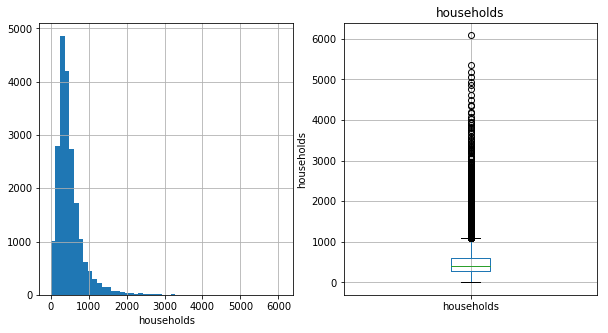

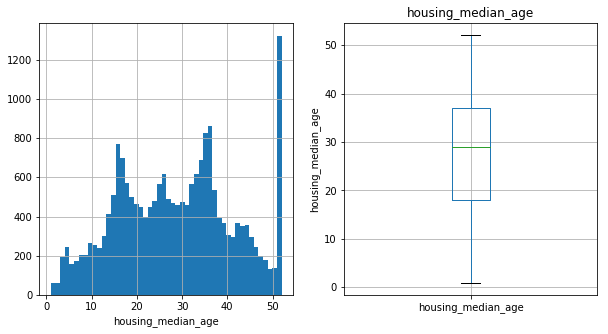

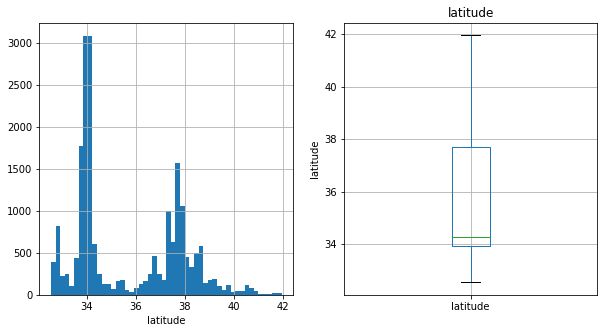

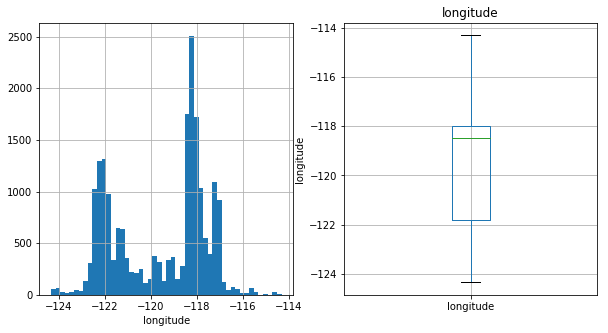

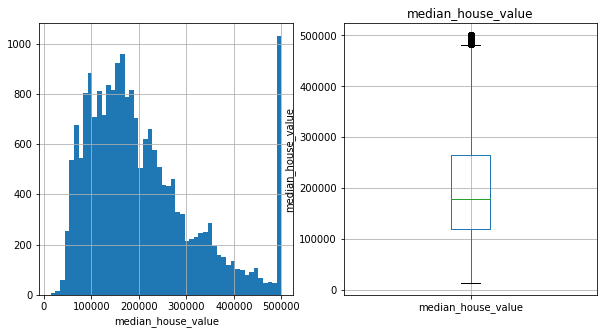

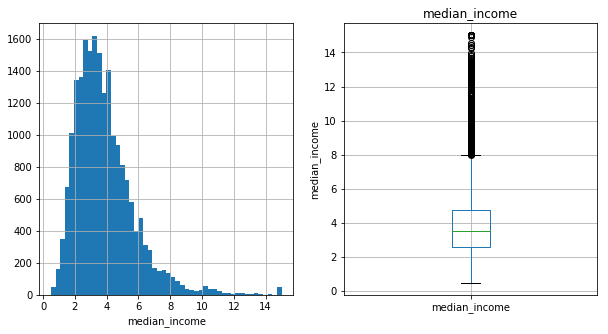

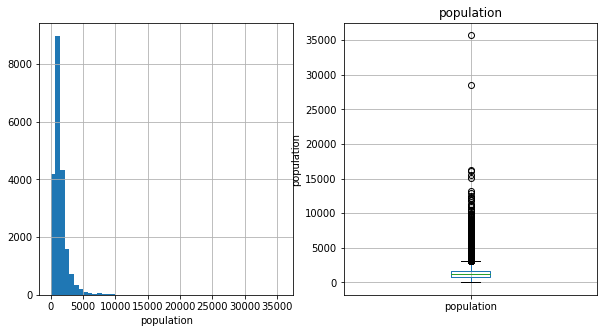

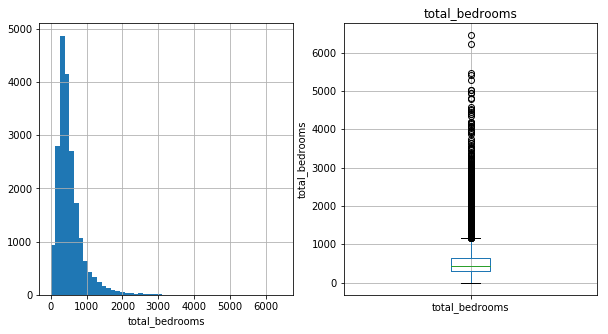

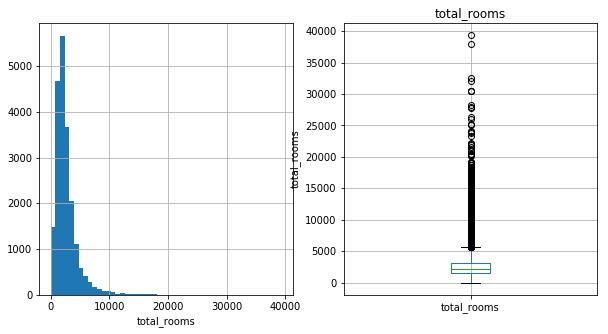

In [29]:

# let's look at the distributions of these variables

for var in num_cols:
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    fig = df_final[var].hist(bins=50)
    fig.set_xlabel(var)
    
    
    
    plt.subplot(122)
    df_final.boxplot(column=var)
    plt.ylabel(var)
    plt.title(var)
    plt.show()

- There are huge outliers in all the independent variables.
- To remove these outliers will choose Standard Scalar.



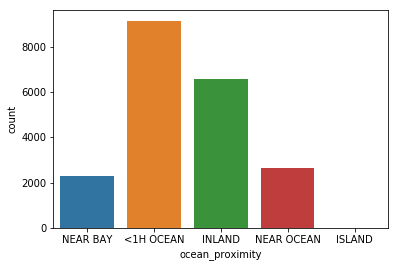

In [30]:
sns.countplot(df['ocean_proximity'])
plt.show()

- The ocean proximity having the <1H OCEAN are having the high values 

In [19]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [32]:
df_final.dtypes

households              int64
housing_median_age      int64
latitude              float64
longitude             float64
median_house_value      int64
median_income         float64
ocean_proximity        object
population              int64
total_bedrooms        float64
total_rooms             int64
dtype: object

In [33]:
df_long_lan = df_final.groupby(['latitude','longitude'])['median_income','median_house_value'].sum()
df_long_lan


median_income  median_house_value
latitude longitude                                   
32.54    -117.04           1.2667               67500
32.55    -117.09           3.9583              144400
         -117.06           1.4384              108800
         -117.04           1.6348               93200
32.56    -117.12           2.9286              257700
...                           ...                 ...
41.86    -121.93           1.7400               44000
41.88    -123.83           3.1300              116700
41.92    -124.16           2.1336               75000
41.95    -124.14           2.2750              122400
         -122.64           1.8242               53500

[12590 rows x 2 columns]

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text xticklabel objects>)

<Figure size 720x720 with 0 Axes>

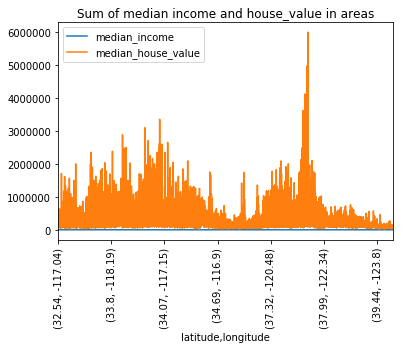

In [34]:
plt.figure(figsize=(10,10))
df_long_lan.plot.line()
plt.title('Sum of median income and house_value in areas')
plt.xticks(rotation = 90)

In [35]:
df_cat = df_final.groupby('ocean_proximity')['median_house_value'].mean()
df_cat

ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64

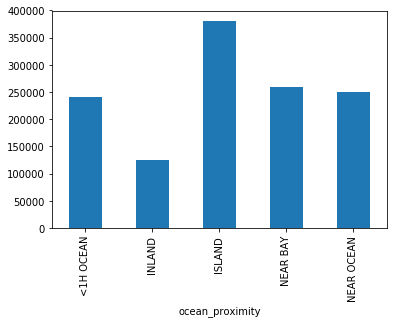

In [36]:
df_cat.plot.bar()
plt.show()

In [37]:
df_pop = df_final.groupby(['population','total_rooms'])['median_house_value'].mean()
df_pop

population  total_rooms
3           18             350000.0
5           18             275000.0
6           2              137500.0
8           6               55000.0
            16              60000.0
                             ...   
15507       32054          253900.0
16122       37937          366300.0
16305       39320          153700.0
28566       32627          118800.0
35682       25135          134400.0
Name: median_house_value, Length: 20591, dtype: float64

# 4. ENCODING CATEGORICAL DATA

In [20]:
house_age = []
for val in df_final['housing_median_age']:
    if val<=10:
        house_age.append('New')
    
    else:
        house_age.append('Old')

In [21]:
df_final['House_Age'] = house_age

In [22]:
df_final.drop('housing_median_age',axis = 1,inplace = True)

In [23]:
le = LabelEncoder()
df_final['House_Age'] = le.fit_transform(df_final['House_Age'])


In [24]:
le = LabelEncoder()
df_final['ocean_proximity'] = le.fit_transform(df_final['ocean_proximity'])

In [25]:
df_new = df_final.copy()

In [26]:
df_new.ocean_proximity.value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

In [27]:
sc = StandardScaler()
df_sc = pd.DataFrame(sc.fit_transform(df_new),columns = df_new.columns)
df_sc.head()

,households,latitude,longitude,median_house_value,median_income,ocean_proximity,population,total_bedrooms,total_rooms,House_Age
0,-0.977033,1.052548,-1.327835,2.129631,2.344766,1.291089,-0.974429,-0.971978,-0.804819,0.28683
1,1.669961,1.043185,-1.322844,1.314156,2.332238,1.291089,0.861439,1.350804,2.045890,0.28683
2,-0.843637,1.038503,-1.332827,1.258693,1.782699,1.291089,-0.820777,-0.826953,-0.535746,0.28683
3,-0.733781,1.038503,-1.337818,1.165100,0.932968,1.291089,-0.766028,-0.719967,-0.624215,0.28683
4,-0.629157,1.038503,-1.337818,1.172900,-0.012881,1.291089,-0.759847,-0.612981,-0.462404,0.28683


In [28]:
X = df_sc.drop('median_house_value',axis = 1)
y = df_sc['median_house_value']

In [48]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [49]:
vif.round(1)

,VIF Factor,features
0,33.8,households
1,8.7,latitude
2,8.9,longitude
3,1.7,median_income
4,1.2,ocean_proximity
5,6.4,population
6,34.8,total_bedrooms
7,12.9,total_rooms
8,1.1,House_Age


# 5. SPLITTING THE DATASET

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 40)

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
Extra_Reg = ExtraTreesRegressor().fit(X_train,y_train)

In [52]:
print(Extra_Reg.feature_importances_)

[0.03349185 0.09660822 0.11167716 0.45978726 0.16996535 0.05162871
 0.03572625 0.0330863  0.00802891]


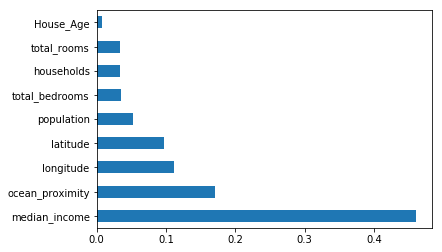

In [53]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(Extra_Reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [54]:
column = ['median_income','ocean_proximity','longitude','latitude','population','total_bedrooms',
         'households','total_rooms']

In [55]:
X_train1 = X_train[column]
X_test1 = X_test[column]

## Model Building`

### 1. Linear Regression

In [56]:
lr = LinearRegression().fit(X_train1,y_train)
y_pred_lr =lr.predict(X_test1)

print(y_pred_lr)

[ 0.21622047  1.07814727 -0.33196645 ...  0.05685561 -0.19791937
  0.40190841]


In [57]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print('R-square for train linear: ',lr.score(X_train1,y_train))
print('R-square for test linear: ',lr.score(X_test1,y_test))

R-square for train linear:  0.6261952427088886
R-square for test linear:  0.6157576763574439


In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

MAE: 0.44284898359630526
MSE: 0.3782419128708829
RMSE: 0.6150137501478181


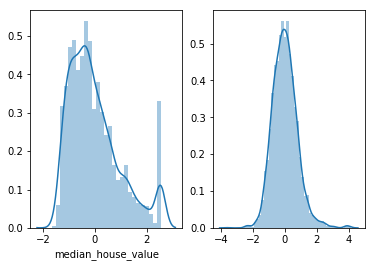

In [59]:
plt.subplot(121)
sns.distplot(y_test)

plt.subplot(122)
sns.distplot(y_pred_lr)

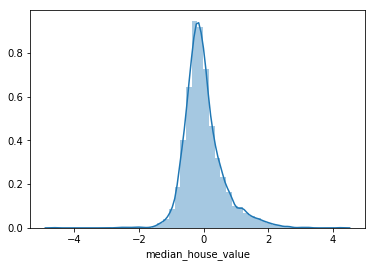

In [60]:
sns.distplot(y_test-y_pred_lr)

Text(0, 0.5, 'Predicted values')

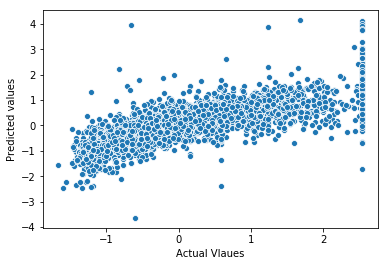

In [61]:
sns.scatterplot(y_test, y_pred_lr)
plt.xlabel('Actual Vlaues')
plt.ylabel('Predicted values')

### 2. Rondom Forest Regressor

In [62]:
rf = RandomForestRegressor()
rf.fit(X_train1,y_train)
y_pred_rf = rf.predict(X_test1)


In [63]:
print(y_pred_rf)

[ 0.6228133   0.91068216 -0.67250126 ... -0.24926002  0.14957762
  0.17501247]


In [64]:
print('R-square for train rf: ',rf.score(X_train1,y_train))
print('R-square for test rf: ',rf.score(X_test1,y_test))

R-square for train rf:  0.9753145360946303
R-square for test rf:  0.8141385902341518


In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

MAE: 0.2757509554846207
MSE: 0.18295895801450274
RMSE: 0.4277370196914253


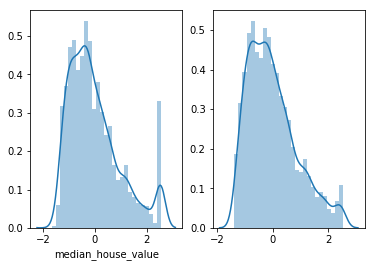

In [66]:
plt.subplot(121)
sns.distplot(y_test)

plt.subplot(122)
sns.distplot(y_pred_rf)

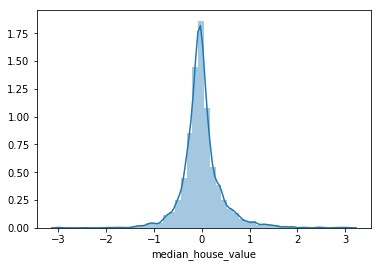

In [67]:


sns.distplot(y_test-y_pred_rf)


Text(0, 0.5, 'Predicted values')

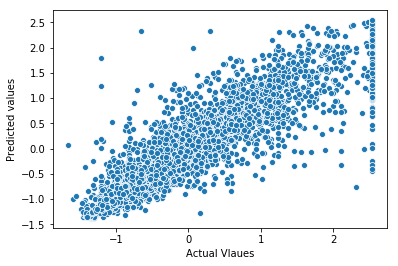

In [68]:
sns.scatterplot(y_test,y_pred_rf)
plt.xlabel('Actual Vlaues')
plt.ylabel('Predicted values')

## 3. Decission Tree

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
tree = DecisionTreeRegressor().fit(X_train1,y_train)

In [71]:
y_pred_tree = tree.predict(X_test1)
print(y_pred_tree)

[ 0.56974241  0.90425195 -0.5819757  ... -0.28732998  0.04284654
  0.00904894]


In [72]:
print('R-square for train Decision Tree: ',tree.score(X_train1,y_train))
print('R-square for test Decision Tree: ',tree.score(X_test1,y_test))

R-square for train Decision Tree:  0.999999999999958
R-square for test Decision Tree:  0.655244090117011


In [73]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_tree))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_tree))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree)))

MAE: 0.36572846557930544
MSE: 0.3393721274416141
RMSE: 0.5825565444157452


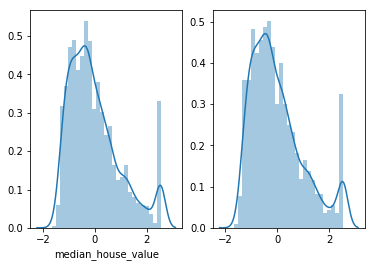

In [74]:
plt.subplot(121)
sns.distplot(y_test)

plt.subplot(122)
sns.distplot(y_pred_tree)

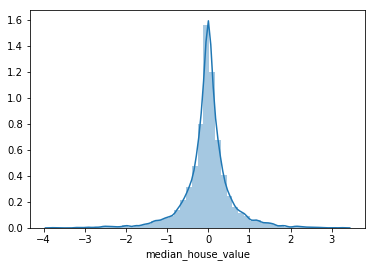

In [75]:

sns.distplot(y_test-y_pred_tree)


Text(0, 0.5, 'Predicted values')

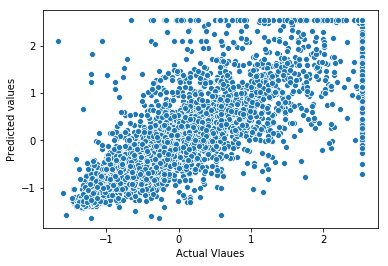

In [76]:

sns.scatterplot(y_test,y_pred_tree)
plt.xlabel('Actual Vlaues')
plt.ylabel('Predicted values')

## Model fitting for `MedianIncome` and `MedianHouseValue`

In [77]:
x = df_sc['median_income'].values
y = df_sc['median_house_value'].values

Text(0, 0.5, 'median house value')

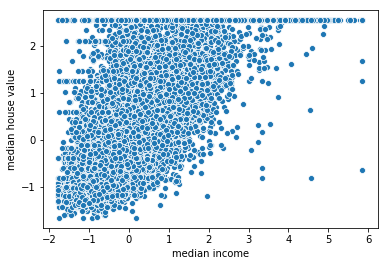

In [78]:
sns.scatterplot(x,y)
plt.xlabel('median income')
plt.ylabel('median house value')

In [79]:
x = x.reshape(-1,1)

In [80]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 40)

In [81]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
y_pred = regressor.predict(X_test)

In [83]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared:  ',regressor.score(X_train, y_train))
print('R-Squared:  ',regressor.score(X_test, y_test))


Mean Absolute Error: 0.5414815504546808
Mean Squared Error: 0.5303746874635684
Root Mean Squared Error: 0.7282682798691485
R-Squared:   0.47644358386554786
R-Squared:   0.4612114750441133


In [84]:
rf.fit(X_train,y_train)
y_pred2_rf = rf.predict(X_test)

In [85]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2_rf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2_rf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2_rf)))
print('R-Squared:  ',rf.score(X_train, y_train))
print('R-Squared:  ',rf.score(X_test, y_test))


Mean Absolute Error: 0.6126286587711869
Mean Squared Error: 0.6812467268371687
Root Mean Squared Error: 0.8253767181337069
R-Squared:   0.7767205066382369
R-Squared:   0.3079460091902734


In [86]:
import statsmodels.formula.api as sfa
import statsmodels.api as sa
import lmdiag

C:\Users\kiran kumar\AppData\Roaming\Python\Python37\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [87]:
model = sfa.ols(formula = 'median_house_value~median_income', data = df_sc).fit()

In [88]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Wed, 11 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:36:57   Log-Likelihood:                -22668.
No. Observations:               20640   AIC:                         4.534e+04
Df Residuals:                   20638   BIC:                         4.536e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.421e-17      0.005  -1.07e-14

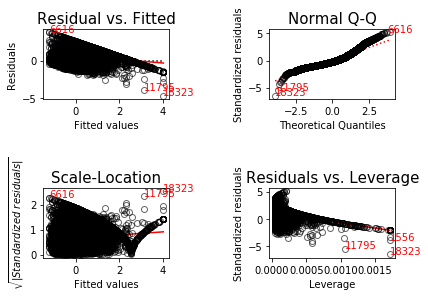

<Figure size 1080x1080 with 0 Axes>

In [89]:
lmdiag.plot(model)
plt.figure(figsize = (15,15))
plt.show()

## Gardient Boosting Regressor

In [90]:
 from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [91]:
clf.fit(X_train1, y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [101]:
y_pred2_clf = clf.predict(X_test1)

In [92]:
clf.score(X_test1,y_test)

0.826642360445905

In [93]:
clf.score(X_train1,y_train)

0.9202948871332558

In [103]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2_clf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2_clf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2_clf)))
print('R-Squared:  ',clf.score(X_train1, y_train))
print('R-Squared:  ',clf.score(X_test1, y_test))


Mean Absolute Error: 0.27299469612212734
Mean Squared Error: 0.1706504493677794
Root Mean Squared Error: 0.413098595213999
R-Squared:   0.9202948871332558
R-Squared:   0.826642360445905


**The plots of Train and Test for the different models**

#### Train and Test data  scatter plot for Linear Regression

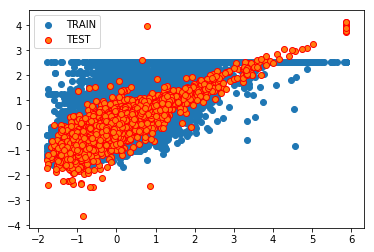

In [94]:
def scatterplot_days():
    plt.scatter(X_train,y_train,edgecolors = None)
    plt.scatter(X_test,y_pred_lr,edgecolors='r')
    plt.legend(['TRAIN','TEST'])
scatterplot_days()

#### Train and Test data  scatter plot for Random Forest

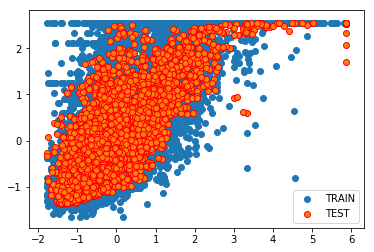

In [95]:
def scatterplot_days():
    plt.scatter(X_train,y_train,edgecolors = None)
    plt.scatter(X_test,y_pred_rf,edgecolors='r')
    plt.legend(['TRAIN','TEST'])
scatterplot_days()

#### Train and Test data  scatter plot for Decision Tree

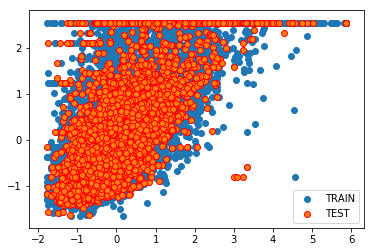

In [98]:
def scatterplot_days():
    plt.scatter(X_train,y_train,edgecolors = None)
    plt.scatter(X_test,y_pred_tree,edgecolors='r')
    plt.legend(['TRAIN','TEST'])
scatterplot_days()

#### Train and Test data  scatter plot for Gradient Boost

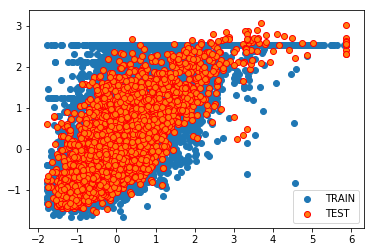

In [104]:
def scatterplot_days():
    plt.scatter(X_train,y_train,edgecolors = None)
    plt.scatter(X_test,y_pred2_clf,edgecolors='r')
    plt.legend(['TRAIN','TEST'])
scatterplot_days()

**Some what random forest having the good score and the actual values and predicted values are nearly same.**